# Timing studies

These are the studies for section 4.1 of the note


In [21]:
import numpy as np
import h5py
import sys
import pandas as pd

sys.path.append("../..")
from usefulFcts import *
from trainNet import myLSTM, DIPS
from plottingFcts import *

import time

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%%bash
nvidia-smi

In [5]:
subDir = 'mc16d_PFlow_ttbar_ip3d'
dataDir = '../../data/' + subDir
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"

dataTagTrain = "3mtrain_15trks_{}".format(vStr)
dataTagTest  = "2mtest_15trks_{}_sd0_rev".format(vStr)

f_name = "{}/data_{}.hdf5".format(dataDir,dataTagTest)
f = h5py.File(f_name,"r")

X = f['X_test'][:]
y = f['y_test'][:]
ix = f['ix_test'][:]

f.close()

### Training alg

In [27]:
leffs, ceffs, beffs = [],[],[]

modelDir = '../../models/'+subDir
figDir = '../../figures/'
nTest, nTrks, nFeatures = X.shape

# # RNNIP
# rnnip = myLSTM(modelDir=modelDir, nFeatures=nFeatures, 
#                dataTag=dataTagTrain+'_sd0_rev', 
#                nHidden=100,loadModel=True,nClasses=3)
# trainingMetrics(rnnip.modelName, modelDir)

# DIPS
dense_sizes = [100] * 3
ppm_sizes = [100,100,128]

# dips = DIPS(ppm_sizes, dense_sizes, batch_norm=True,
#             timeSteps=nTrks, nFeatures=nFeatures,
#             modelDir=modelDir, dataTag=dataTagTrain, 
#             nClasses=3, loadModel=True)
# trainingMetrics(dips.modelName, modelDir)

# dipsAttn = DIPS(ppm_sizes, dense_sizes, batch_norm=True,
#                 timeSteps=nTrks, nFeatures=nFeatures,
#                 modelDir=modelDir, dataTag=dataTagTrain+'_iter0', 
#                 nClasses=3, loadModel=True, attn=True)

# trainingMetrics(dipsAttn.modelName, modelDir)


The accuracy curves look kind of crappy, I think I'll just include the loss in my PUB note appendices!!

In [15]:
def getTrainingStats(model,nIters=5):
    '''
    Parse the training log files to get the training stats for the timing experiments
    that I ran on the slacgpu queue.
    
    Inputs:
    - model
    - nIters: # of iterations I used to submit the timing experiments
    Outputs:
    - trainingStats: A dictionary that saves the time *per epoch* for each iteration
                     over the dataset for ...
    '''
    
    trainingStats = {}

    for i in range(nIters=ters):

        file  = open(f"../../output/sec4.1_{model}_iter{i}.log")

        trainingStats[i] = []

        print(i)
        
        for l in file:
            if l[:4] == 'name':
                print(l)
                #assert '1080 Ti' in l

#             if l[:48] == '2314039/2314039 [==============================]':

#                 seconds = int(l.split(" ")[3][:-1])
#                 trainingStats[i].append(seconds)

            if l[:48] == '2296140/2296140 [==============================]':

                seconds = int(l.split(" ")[3][:-1])
                trainingStats[i].append(seconds)
                
            if l[:15] == 'Training time: ':
                ttlMin = l.split(" ")[2]
                trainingStats[f'ttl{i}'] = int(ttlMin)
         
                
    return trainingStats   

In [19]:
# file  = open(f"../../output/sec4.1_DIPS_iter1.log")

# for l in file:
#     print(l)

In [28]:
rnnip_stats = getTrainingStats('LSTM')

0
1


FileNotFoundError: [Errno 2] No such file or directory: '../../output/sec4.1_LSTM_iter2.log'

In [16]:
dips_stats = getTrainingStats('DIPS')
dips_stats

0
name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

1
name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582

name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582

name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582

2
3
4
name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582

name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582

name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582



{0: [121,
  97,
  94,
  93,
  98,
  94,
  94,
  94,
  97,
  96,
  95,
  100,
  96,
  96,
  96,
  94,
  95,
  95,
  96,
  94,
  96,
  95,
  96,
  94,
  96,
  96,
  95,
  98,
  100,
  94,
  98,
  95,
  94,
  94],
 'ttl0': 55,
 1: [115,
  104,
  104,
  98,
  102,
  103,
  103,
  101,
  102,
  102,
  113,
  111,
  103,
  104,
  115,
  113,
  102,
  103,
  101,
  101,
  102,
  102,
  105,
  104],
 'ttl1': 42,
 2: [],
 3: [],
 4: [133,
  126,
  128,
  125,
  125,
  126,
  126,
  126,
  134,
  119,
  110,
  128,
  128,
  108,
  106,
  106,
  104,
  107,
  107,
  108,
  122,
  109,
  103,
  104,
  103,
  104,
  102,
  102,
  104,
  103,
  104,
  101,
  102,
  103,
  104,
  101,
  100,
  102],
 'ttl4': 71}

In [17]:
dipsAttn_stats = getTrainingStats('DIPSattn')
dipsAttn_stats

0
name: Tesla V100-SXM2-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.53

name: Tesla V100-SXM2-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.53

name: Tesla V100-SXM2-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.53

1
name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

2
name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582

name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582

name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582

3
name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

4
name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545

name: GeForce RTX 2080 Ti major: 7 minor:

{0: [149,
  137,
  128,
  125,
  123,
  127,
  120,
  119,
  124,
  127,
  123,
  125,
  127,
  122,
  118,
  133,
  138,
  126,
  125,
  124,
  118,
  123],
 'ttl0': 46,
 1: [109,
  98,
  98,
  98,
  98,
  97,
  97,
  99,
  98,
  97,
  102,
  97,
  99,
  99,
  99,
  97,
  98,
  98,
  97,
  99,
  99,
  99,
  99,
  100,
  99,
  99,
  101],
 'ttl1': 45,
 2: [124,
  121,
  119,
  113,
  112,
  113,
  113,
  111,
  112,
  111,
  113,
  110,
  111,
  110,
  112,
  110,
  109,
  110,
  130,
  128,
  127,
  126,
  129,
  119,
  111,
  111,
  110],
 'ttl2': 52,
 3: [133,
  130,
  127,
  130,
  105,
  112,
  130,
  134,
  118,
  99,
  98,
  96,
  97,
  96,
  100,
  98,
  98,
  99,
  98,
  99,
  97,
  97,
  99,
  96],
 'ttl3': 43,
 4: [108,
  97,
  100,
  105,
  98,
  100,
  97,
  97,
  97,
  100,
  98,
  98,
  99,
  99,
  99,
  98,
  97,
  100,
  97,
  103,
  101,
  100,
  101,
  98,
  98,
  99],
 'ttl4': 43}

Wow, DIPS with attention actually trains *faster*!! I guess if it's a more physically motivated model, this makes sense?

Is this saying that RNNIP is taking and hour and a half - two hours to train? I guess... probably worth double-checking some of these metrics...

- Was it the inclusion of $\tau$s in the training that was taking so much longer? 
- Or was I getting training datasets confused? (As in extended hybrid vs $t\bar{t}$ with the larget # of hidden layers)
- Or is this a model that only had 50 hidden units? 

**Get these evaluation metrics**

I want to compare the evaluation time across these models *and* I want to compare the performance of the curves across these models!


In [14]:
rnnip.modelName

'LSTM_100units_10dense_3out_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev'

In [23]:
nIter=5

In [22]:
leffs, ceffs, beffs, = [],[],[]
labels = [f'rnnip iter {i}' for i in range(nIter)]

eval_rnnip = []

for i in range(nIter):
    
    # Load in the model
    rnnip = myLSTM(modelDir=modelDir, nFeatures=nFeatures, 
                   dataTag=dataTagTrain+f'_sd0_rev_iter{i}', 
                   nHidden=100,loadModel=True,nClasses=3)
    
    start = time.time()
    leff, ceff, beff = sigBkgEff(rnnip, X, y, ix, figDir=figDir,
                                 subDir=subDir, modelDir=modelDir)
    end = time.time()
    
    eval_rnnip.append( end - start )
    print(i, end - start)
    
    leffs.append(leff)
    ceffs.append(ceff)
    beffs.append(beff)
    
eval_rnnip = np.array(eval_rnnip)

NameError: name 'nIter' is not defined

Maybe it's training super fast because it's *wrong*?

No, when "Building the baseline LSTM" gets printed, it's using an untrained model.

In [ ]:
rnnip.modelName

### Comparison of ensembling methods

In [ ]:
plotROCRatio(beffs[1:], leffs[1:], labels[1:], rrange=(0.9,1.1))

Ok, so these variations are *basically* below the 5% level.

**Question: How does this compare to the binomial errors?**

In [ ]:
np.mean(eval_rnnip), np.std(eval_rnnip)

### Inference time

**RNNIP**

Note - the block below is just comparing a single training, so it *wasn't* doing at all what I wanted!!

Ok, Michael wants me to exclude trackless jets from the evaluation!

**Plan:** I'm going to start off leaving them in, and then I can take them out later.


In [ ]:
92/17

**DIPS**

In [24]:
colors=['C6','C9','C4']

Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_ip3d/DIPS_phi_100_100_128_F_100_100_100_3out_bn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter0_weights.h5
Loading previously trained DIPS weight file
min: -13.57, max: 15.21


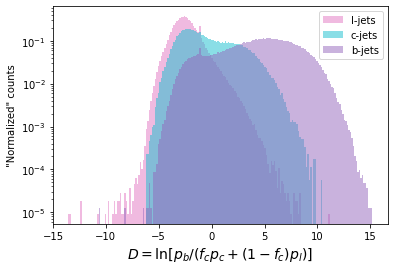

0 84.71352982521057
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_ip3d/DIPS_phi_100_100_128_F_100_100_100_3out_bn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter1_weights.h5
Loading previously trained DIPS weight file
min: -11.65, max: 15.16


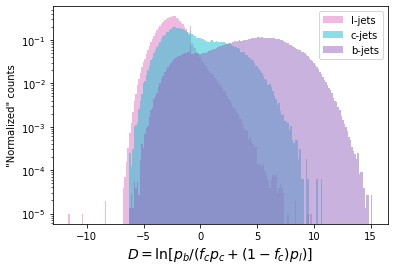

1 89.59280729293823
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_ip3d/DIPS_phi_100_100_128_F_100_100_100_3out_bn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter2_weights.h5
Loading previously trained DIPS weight file
min: -14.33, max: 15.82


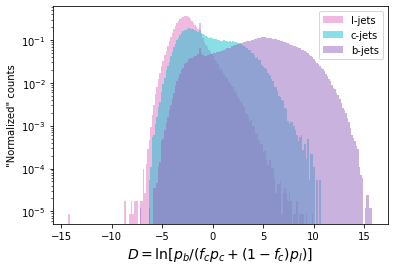

2 90.26141738891602
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_ip3d/DIPS_phi_100_100_128_F_100_100_100_3out_bn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter4_weights.h5
Loading previously trained DIPS weight file
min: -18.59, max: 14.58


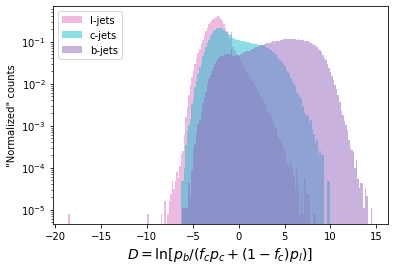

4 90.77261567115784


In [30]:
leffs, ceffs, beffs, = [],[],[]

labels = [f'dips iter {i}' for i in range(nIter)]

eval_dips = []

for i in range(nIter):
    
    if i == 3:
        continue
    
    # Load in the model
    dips = DIPS(ppm_sizes, dense_sizes, timeSteps=nTrks, nFeatures=nFeatures,
                modelDir=modelDir, dataTag=dataTagTrain+f'_iter{i}', 
                batch_norm=True, nClasses=3, loadModel=True)
    
    start = time.time()
    leff, ceff, beff = sigBkgEff(dips, X, y, ix, figDir=figDir,
                                 subDir=subDir, modelDir=modelDir, colors=colors)
    end = time.time()
    
    eval_dips.append( end - start )
    print(i, end - start)
    
    leffs.append(leff)
    ceffs.append(ceff)
    beffs.append(beff)
    
eval_dips = np.array(eval_dips)

In [ ]:
plotROCRatio(beffs, leffs, labels, rrange=(0.9,1.1))

In [ ]:
plotROCRatio(beffs, ceffs, labels, rrange=(0.95,1.05))

Ok - they're *basically* the same... I feel like I should include more ... in the comparison?

In [ ]:
np.mean(eval_dips), np.std(eval_dips)

In [ ]:
eval_dips

Is it just me - or is this taking longer on gpus than cpus?? Whaaaaat???

**DIPS with Attention**

Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_ip3d/DIPS_phi_100_100_128_F_100_100_100_3out_bn_attn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter0_weights.h5
Loading previously trained DIPS weight file
min: -11.40, max: 13.15


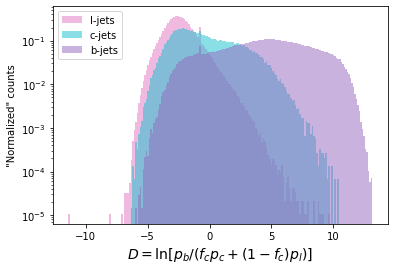

0 100.12390780448914
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_ip3d/DIPS_phi_100_100_128_F_100_100_100_3out_bn_attn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter1_weights.h5
Loading previously trained DIPS weight file
min: -8.27, max: 13.97


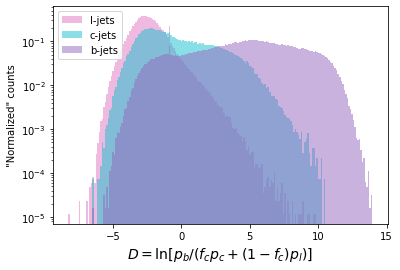

1 103.87810015678406
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_ip3d/DIPS_phi_100_100_128_F_100_100_100_3out_bn_attn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter2_weights.h5
Loading previously trained DIPS weight file
min: -6.67, max: 12.75


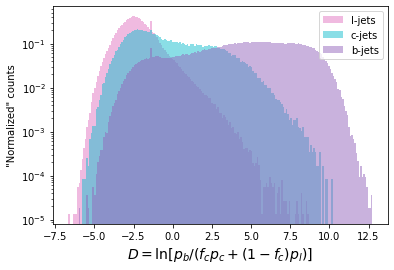

2 116.42760610580444
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_ip3d/DIPS_phi_100_100_128_F_100_100_100_3out_bn_attn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter3_weights.h5
Loading previously trained DIPS weight file
min: -7.31, max: 14.36


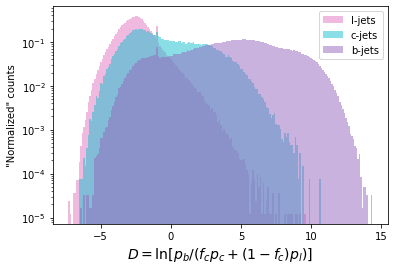

3 122.69359517097473


In [32]:
leffs, ceffs, beffs, = [],[],[]

labels = [f'dips w/ attn iter {i}' for i in range(nIter)]

eval_dips_attn = []

for i in range(nIter):
    
    if i == 4:
        continue
    
    # Load in the model
    dipsAttn = DIPS(ppm_sizes, dense_sizes, timeSteps=nTrks, nFeatures=nFeatures,
                    modelDir=modelDir, dataTag=dataTagTrain+f'_iter{i}', attn=True,
                    batch_norm=True, nClasses=3, loadModel=True)
    
    start = time.time()
    leff, ceff, beff = sigBkgEff(dipsAttn, X, y, ix, figDir=figDir,
                                 subDir=subDir, modelDir=modelDir, colors=colors)
    end = time.time()
    
    eval_dips_attn.append( end - start )
    print(i, end - start)
    
    leffs.append(leff)
    ceffs.append(ceff)
    beffs.append(beff)
    
eval_dips_attn = np.array(eval_dips_attn)

In [ ]:
#i

In [33]:
i

4

In [35]:
np.mean(eval_dips_attn),np.std(eval_dips_attn)

(110.78080230951309, 9.151744702164741)

In [ ]:
dips.model.summary()

In [40]:
?plotROCRatio

In [42]:
nTest = [np.sum(y==i) for i in range(3)]

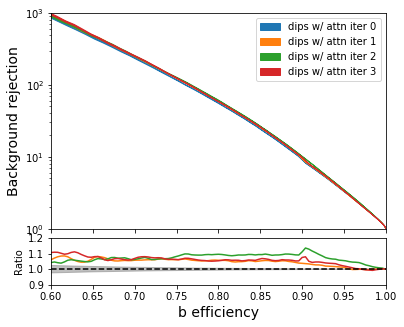

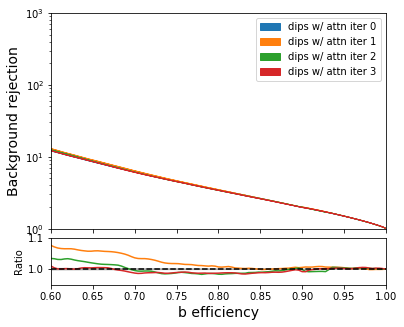

In [45]:
plotROCRatio(beffs, leffs, labels, rrange=(0.9, 1.2),binomialErrors=True,nTest=1.5e6)#,ymax=2e3)
plotROCRatio(beffs, ceffs, labels, rrange=(0.95,1.1),binomialErrors=True,nTest=1.5e6)

What is the take away message here?

- If the comparisons between my studies are of the order of 10%, maybe I should average the results?
- How does this compare to the `binomialErrors`: **Caveat** I'm not 100% sure I'm doing the right thing for nTest atm!

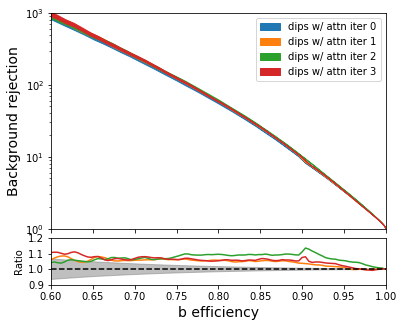

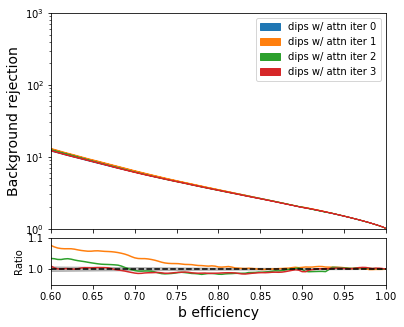

In [46]:
plotROCRatio(beffs, leffs, labels, rrange=(0.9, 1.2),binomialErrors=True,nTest=2e5)#,ymax=2e3)
plotROCRatio(beffs, ceffs, labels, rrange=(0.95,1.1),binomialErrors=True,nTest=2e5)

Ok, and I *think* these are the studies that I wanted in this notebook!

Or at least - these are a good portion of the studies that I wanted in this nb!!


**Other metrics:**
- min value of the loss over several iterations
- I thought it would be nice to overlay the training / validation loss curves as well
- Compare the number of epochs to fit for the different models?